In [8]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

# In order to make the import of local modules
import sys
sys.path.append('..')

# local modules
from ml.bayes import BayesRule

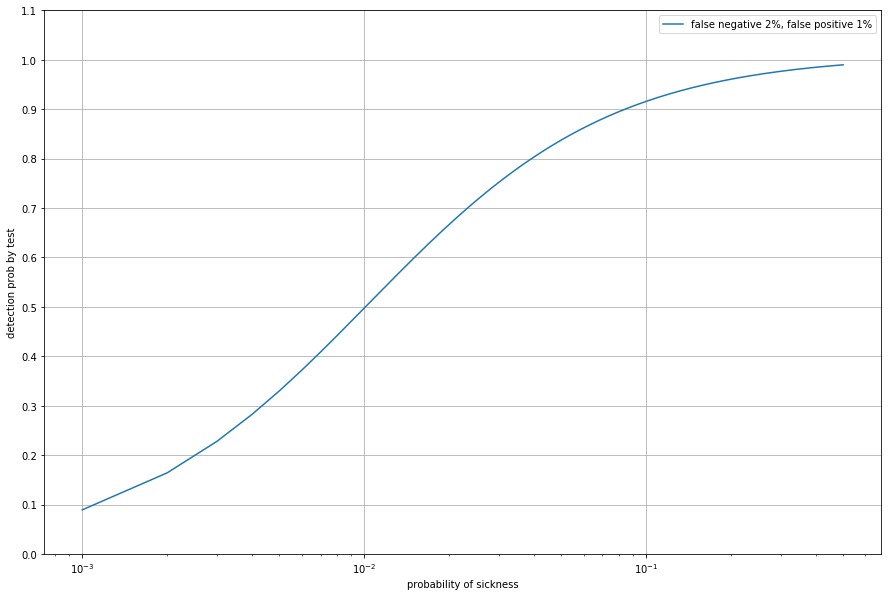

In [46]:
"""
Check the probability of disease from which a test with 2% false negative and 1% false positive starts to be relevant
"""

sick_probs = np.linspace(0.001, 0.5, 500)
diagnostic_probs = []

for p_sick in sick_probs:
    bayes = BayesRule(
        priors={"infected": p_sick, "healthy": (1-p_sick)},
        conditions={
            "infected": {True: 0.98, False: 0.02}, # false negative of 2%
            "healthy": {True: 0.01, False: 0.99}   # false positive of 1%
        }
    )
    bayes.observation(True)
    diagnostic_probs.append(bayes.posterior_of("infected"))

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(sick_probs, diagnostic_probs, label='false negative 2%, false positive 1%')
ax.grid(axis='both')
ax.set_xlabel('probability of sickness')
ax.set_ylabel('detection prob by test')
ax.set_xscale("log")
ax.set_yticks(np.linspace(0, 1.1, 12))
ax.legend()
plt.show()

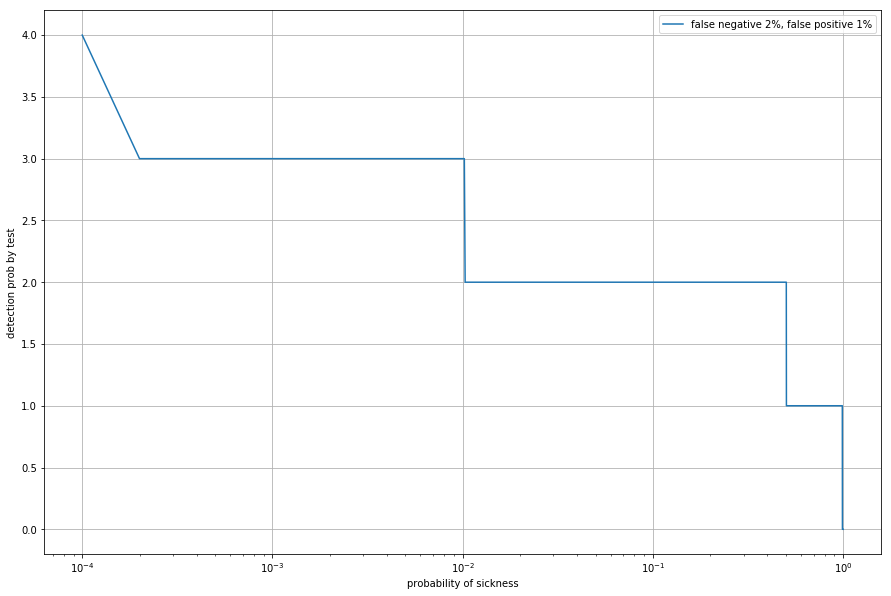

In [54]:
"""
Diagnosing a disease:
- imagine that all tests are independents and all have the same probabilities of false positive and false negative
- check how many iteration of observations you need before the reaching a certainty of 99% of infection
- check how many iteration of observations you need before the priors do not matter much anymore
"""

sick_probs = np.linspace(0.0001, 1.0, 10000)
diagnostic_probs = []

for p_sick in sick_probs:
    bayes = BayesRule(
        priors={"infected": p_sick, "healthy": (1-p_sick)},
        conditions={
            "infected": {True: 0.98, False: 0.02}, # false negative of 2%
            "healthy": {True: 0.01, False: 0.99}   # false positive of 1%
        }
    )
    
    count = 0
    infection_certainty = bayes.posterior_of("infected")
    while infection_certainty < 0.99:
        bayes.observation(True)
        infection_certainty = bayes.posterior_of("infected")
        count += 1
    diagnostic_probs.append(count)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(sick_probs, diagnostic_probs, label='false negative 2%, false positive 1%')
ax.grid(axis='both')
ax.set_xlabel('probability of sickness')
ax.set_ylabel('detection prob by test')
ax.set_xscale("log")
ax.legend()
plt.show()